<a href="https://colab.research.google.com/github/minhtuan150801/DataAnalystDeepLearning/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vấn đề 1:**

Tiến hành tải dữ liệu vào chương trình ứng dụng Python và giải quyết vấn đề ―Missing header in the csv file‖

In [49]:
import pandas as pd


Hiển thị và quan sát dữ liệu patient_heart_rate

In [50]:
patientheartrate = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/patient_heart_rate.csv')

In [51]:
patientheartrate.head(5)

,1,Mickéy Mousé,56,70kgs,72,69,71,-,-.1,-.2
0,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
1,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
2,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
3,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
4,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72


patientheartrate thiếu phần headers, giả sử ta cần bổ sung headers vào cho dataframe patientheartrate, thông tin các cột như sau: column_names=["ID", "Name", "Age", "Weight", "m0006", "m0612","m1218", "f006", "f0612", "f1218"]

In [52]:
column_names=["ID", "Name", "Age", "Weight", "m0006", "m0612","m1218", "f006", "f0612", "f1218"]
patientheartrate = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/patient_heart_rate.csv', names = column_names)

In [53]:
patientheartrate.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75



**Vấn đề 2:**

Xử lý vấn đề một cột lưu hỗn hợp nhiều dữ liệu, ở đây là cột ―Name‖ chứa bao gồm ―Firstname‖ và ―Lastname‖, giải pháp là ta sẽ tách ra làm 2 cột dựa vào giá trị khoảng trắng

In [54]:
patientheartrate[['Firstname', 'Lastname']]=patientheartrate['Name'].str.split(expand = True)

In [55]:
patientheartrate.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


#Xoá cột Name
patientheartrate = patientheartrate.drop('Name',axis=1)

In [56]:
patientheartrate

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72,Huey,McDuck
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Vấn đề 3**

Quan sát dữ liệu trên cột Weight ta thấy có hai đơn vị đo lường được sử dụng gồm kg và pound (lbs). Phần này sẽ chuyển đơn vị đo lường từ lbs về kg theo quy tắc chuyển đổi sau: (1 lbs sẽ bằng 0.453592kg (1/2.205 kg)

In [57]:
weight=patientheartrate['Weight']
for i in range(len(weight)):
  x = str(weight[i])
  if "lbs" in x[-3:]:
    #remove the lbs from the value
    x = x[:-3:]
    float_x = float(x)
    y = int(float_x/2.205)
    y = str(y)+"kgs"
    weight[i] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [58]:
patientheartrate.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


**Vấn đề 4:**

Khảo sát dữ liệu thiếu và xóa dòng dữ liệu rỗng

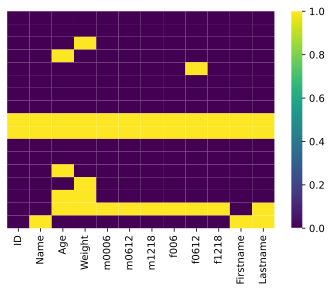

In [59]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [60]:
patientheartrate.dropna(how="all", inplace = True)

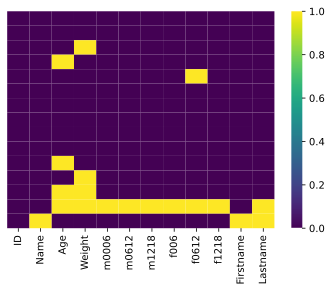

In [61]:

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')


**Vấn đề 5:**

Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, age, weight,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý.

In [62]:
patientheartrate = patientheartrate.drop_duplicates(subset=['Firstname','Lastname', 'Age', 'Weight'])

In [63]:
patientheartrate = patientheartrate.drop_duplicates(subset=['Firstname','Lastname', 'Age', 'Weight'])

**Vấn đề 6:**

Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. Giải pháp: Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế bằng dữ liệu khác hoặc thay bằng việc đánh dấu bằng một kí tự khác (ví dụ: ‗warning‘) Tham khảo: https://stackoverflow.com/questions/5008422/how-to-remove-high-ascii-characters-from-string-like-in-java

In [64]:
patientheartrate.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True,inplace=True)

In [65]:
patientheartrate.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Micky,Mousé
1,2.0,Donald Duck,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


***  Vấn đề 7**

―Missing values‖, vấn đề này xảy ra tại các cột ―Age‖, ―Weight‖ và ―Heart Rate‖. Thiếu dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều nguyên nhân chủ quan lẫn khách quan.Có một vài giải pháp để xử lý vấn đề này, chủ yếu dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa đề xuất từ chuyên gia như sau:

a. Deletion: Remove records with missing values b. Dummy substitution: Replace missing values with a dummy but valid value: e.g.: 0 for numerical values. c. Mean substitution: Replace the missing values with the mean. d. Frequent substitution: Replace the missing values with the most frequent item. e. Improve the data collector: Your business folk will talk to the clients and inform them about why it is worth fixing the problem with the data collector.

Yêu cầu: - Thống kê thông tin dữ liệu thiếu trên từng biến Age và Weight - Yêu cầu xử lý dữ liệu thiếu như sau: Nếu dòng nào có Age hoặc Weight có dữ liệu thì phần Age hoặc Weight được tính như bên dưới, nếu thiếu cả 2 thông tin thì xóa dòng

Age: Giá trị thay thế là mean của các giá trị trong cột Age
Weight: Giá trị thay thế là mean của các giá trị trong cột Weight theo nhóm giới tính

Kiểm tra dữ liệu rỗng

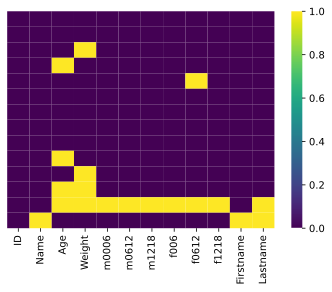

In [66]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

Lấy index của các dòng thiếu thông tin Age và Weight

In [67]:
index_ageweightnull = patientheartrate[patientheartrate['Age'].isna() & patientheartrate['Weight'].isna()].index
index_ageweightnull

Int64Index([14, 15], dtype='int64')

In [68]:
patientheartrate.drop(index_ageweightnull, inplace=True)

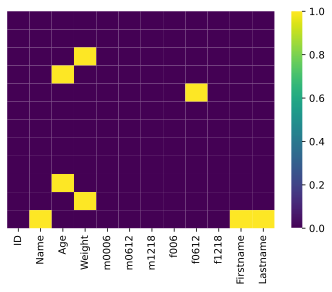

In [69]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [70]:
patientheartrate['Age'].fillna(patientheartrate['Age'].mean(), inplace =False)

0     56.0
1     34.0
2     16.0
3     36.1
4     54.0
5     52.0
6     19.0
7     32.0
11    12.0
12    36.1
13    34.0
16    52.0
Name: Age, dtype: float64


Vấn đề 8

melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value. (Tham khảo: https://www.geeksforgeeks.org/python-pandas-melt/)


Ví dụ: patientheartrate là dataframe, trong đó các cột m006, m0612,m1218, f0612, f1218 xác định thông tin thuộc tính. Chẳng hạn, m1218, chứa được các thông tin gồm m: male, 1218 ~ 12-18 (mm-dd). Trong khi đó, giá trị hiện tại của cột là thông tin huyết áp (PluseRate) tương ứng.


Ứng dụng melt() function để cập nhật là các columns trong dataframe trên bằng cách giữ lại các cột ID, Age, Weight, Firstname, Lastname. Chuyển các cột m0006, m0612, m1212, f0621, f1218 thành values của cột sex_and_time, giá trị hiện tại của các cột đó sẽ là giá trị của cột mới PluseRate

In [71]:
patientheartrate

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Micky,Mousé
1,2.0,Donald Duck,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,Huey McDuck,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-,Scpy,Doo
11,10.0,Louie McDuck,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,Henry Nam,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


In [72]:
df = pd.melt(patientheartrate, id_vars=['ID', 'Age', 'Weight', 'Firstname', 'Lastname'], value_name="PulseRate",var_name="sex_and_time").sort_values(['ID', 'Age', 'Weight', 'Firstname', 'Lastname'])

In [73]:
len(df['PulseRate'])

84

In [74]:
df.head(10)

,ID,Age,Weight,Firstname,Lastname,sex_and_time,PulseRate
0,1.0,56.0,70kgs,Micky,Mousé,Name,Mickéy Mousé
12,1.0,56.0,70kgs,Micky,Mousé,m0006,72
24,1.0,56.0,70kgs,Micky,Mousé,m0612,69
36,1.0,56.0,70kgs,Micky,Mousé,m1218,71
48,1.0,56.0,70kgs,Micky,Mousé,f006,-
60,1.0,56.0,70kgs,Micky,Mousé,f0612,-
72,1.0,56.0,70kgs,Micky,Mousé,f1218,-
1,2.0,34.0,70kgs,Donald,Duck,Name,Donald Duck
13,2.0,34.0,70kgs,Donald,Duck,m0006,-
25,2.0,34.0,70kgs,Donald,Duck,m0612,-


In [75]:
#Extract sex, hour lower bound and hour upper dound group
tmp_df= df["sex_and_time"].str.extract("(\D)(\d+)(\d{2})", expand=True)

In [76]:
#Name columns
tmp_df.columns=["Sex","hours_lower","hours_upper"]

In [77]:
#Create Time column based on "hours_lower" and "hours_upper" columns
tmp_df["Time"]=tmp_df["hours_lower"] + "-"+ tmp_df["hours_upper"]

In [78]:
#Merge
df =pd.concat([df, tmp_df], axis=1)

In [79]:
#Drop unnecessary columns and rows
df = df.drop(['sex_and_time','hours_lower','hours_upper'], axis=1)
df = df.dropna()

In [80]:
len(df['PulseRate'])

41

In [81]:

df.head(10)

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time
12,1.0,56.0,70kgs,Micky,Mousé,72,m,00-06
24,1.0,56.0,70kgs,Micky,Mousé,69,m,06-12
36,1.0,56.0,70kgs,Micky,Mousé,71,m,12-18
48,1.0,56.0,70kgs,Micky,Mousé,-,f,0-06
60,1.0,56.0,70kgs,Micky,Mousé,-,f,06-12
72,1.0,56.0,70kgs,Micky,Mousé,-,f,12-18
13,2.0,34.0,70kgs,Donald,Duck,-,m,00-06
25,2.0,34.0,70kgs,Donald,Duck,-,m,06-12
37,2.0,34.0,70kgs,Donald,Duck,-,m,12-18
49,2.0,34.0,70kgs,Donald,Duck,85,f,0-06


# **ĐỀ BÀI**

***Hãy khảo sát tỉ lệ dữ liệu thiếu trên biến huyết áp. Dữ liệu bị thiếu thì hãy xử lý bằng phương pháp sau*** 


Thay thế bằng giá trị trung bình liền trước và liền sau của người đó. Nếu không được thì dùng 2)

Thay thế bằng giá trị trung bình 2 giá liền trước của người đó. Nếu không được thì dùng 3)

Thay thế bằng giá trị trung bình 2 giá liền sau của người đó. Nếu không được thì dùng 4)

Trung bình của các giá trị huyết áp của người đó. Nếu không được thì dùng 5)

Trung bình của các giá trị huyết áp của nhóm giới tính. Nếu không được thì dùng 6)

Trung bình của các giá trị dữ liệu. Nếu không được thì thay bằng mức ổn định trong y học

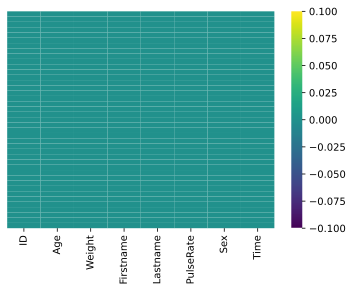

In [82]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(df.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [83]:
df['PulseRate']= df['PulseRate'].replace({'-' : '0'}, regex=True)
df["PulseRate"].fillna('0', inplace =True)
len(df["PulseRate"])

41

In [84]:
def avgPulserate(df, firstname):
  sumPulserate = 0
  nsumPulserate = 0
  for i, value in enumerate(df['Firstname']):
    if value == firstname:
      try:
        if df['PulseRate'][i] !='0':
          sumPulserate += int(df['PulseRate'].values[i])
          nsumPulserate += 1
      except:
        pass
  if nsumPulserate > 0:
    return str(sumPulserate/nsumPulserate)
  else:
    return 0

In [85]:
def isValidIndex1(index, nrows):
  return index - 1 > 0 & index + 1 < nrows

In [86]:
def isValidIndex2(index, nrows):
  return index + 1 < nrows & index + 2 < nrows

In [87]:
def isPulseRateNotNull1(index, df):
  return str(df['PulseRate'].values[index-1])!= '0' and str(df['PulseRate'].values[index+1])!= '0'

In [88]:
def isPulseRateNotNull2(index, df):
  return str(df['PulseRate'].values[index+1])!= '0' and str(df['PulseRate'].values[index +2])!= '0'

In [89]:
def isInGroup1(df, index, firstname):
  return df['Firstname'].values[index-1]== firstname and df['Firstname'].values[index +1]== firstname

In [90]:
def isInGroup2(df, index, firstname):
  return df['Firstname'].values[index+1]== firstname and df['Firstname'].values[index +2]== firstname

In [91]:
def updatePulseRatena (index, df):
  nrows = len(df['PulseRate']) -2
  newvalue = ''
  firstname = df['Firstname'].values[index]
  try:
    if isValidIndex1(index,nrows) & isPulseRateNotNull1(index, df) & isInGroup1(df, index, firstname):
      try: 
        newvalue = (int(df['PulseRate'].values[index-1]) + int(df['PulseRate'].values[index+1]))/2
      except:
        newvalue = '0'
    elif isValidIndex2(index,nrows) & isPulseRateNotNull2(index, df) & isInGroup2(df, index, firstname):
      try:
        newvalue = (int(df['PulseRate'].values[index-1]) + int(df['PulseRate'].values[index+1]))/2
      except:
        newvalue ='0'
    else:
      newvalue = avgPulserate(df, firstname)
  except:
      newvalue = avgPulserate(df, firstname)
  finally:
    pass
  return newvalue

In [92]:
len(df["PulseRate"])

41

In [93]:
pulserateupdate = []
for index, value in enumerate(df["PulseRate"]):
  if value =='0' or value == '':
    newvalue = updatePulseRatena(index,df)
    pulserateupdate.append(newvalue)
  else:
    pulserateupdate.append(value)

In [94]:

df["PulseRateUpdate"] = pulserateupdate

In [95]:
len(df["PulseRateUpdate"])

41

In [96]:
df

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time,PulseRateUpdate
12,1.0,56.0,70kgs,Micky,Mousé,72,m,00-06,72
24,1.0,56.0,70kgs,Micky,Mousé,69,m,06-12,69
36,1.0,56.0,70kgs,Micky,Mousé,71,m,12-18,71
48,1.0,56.0,70kgs,Micky,Mousé,0,f,0-06,0
60,1.0,56.0,70kgs,Micky,Mousé,0,f,06-12,0
72,1.0,56.0,70kgs,Micky,Mousé,0,f,12-18,0
13,2.0,34.0,70kgs,Donald,Duck,0,m,00-06,0
25,2.0,34.0,70kgs,Donald,Duck,0,m,06-12,0
37,2.0,34.0,70kgs,Donald,Duck,0,m,12-18,0
49,2.0,34.0,70kgs,Donald,Duck,85,f,0-06,85
